In [1]:
import googleapiclient.discovery
import pandas as pd
import creds

api_service_name = "youtube"
api_version = "v3"

youtube = googleapiclient.discovery.build(
    api_service_name, api_version, developerKey=creds.DEVELOPER_KEY)

video_Id = "uJMCNJP2ipI"
comments = []
next_page_token = None

while True:
    request = youtube.commentThreads().list(
        part = "snippet",
        videoId = video_Id,
        maxResults = 100, # Maximum allowed by Youtube Data API
        pageToken = next_page_token if next_page_token else ""
    )
    response = request.execute()

    for item in response['items']:
        comment = item['snippet']['topLevelComment']['snippet']
        comments.append([
            comment['authorDisplayName'],
            comment['publishedAt'],
            comment['updatedAt'],
            comment['likeCount'],
            comment['textDisplay']
        ])
    next_page_token = response.get('nextPageToken')

    if not next_page_token:
        break

df = pd.DataFrame(comments, columns = ['author', 'published_at', 'updated_at', 'like_count', 'text'])

print(df["text"])

0                                ❤ I&#39;m so darn excited
1                        It&#39;s my birthday on 26 July😅😂
2               Glad to have Deadpool to fix all MCU crap.
3        Deadpool keeps me hope that the Punisher will ...
4        Deadpool 2 kinda sucked. This movies going to ...
                               ...                        
27589                                        First comment
27590                                                First
27591                                               Yooo 😊
27592                                                  Omg
27593                                                First
Name: text, Length: 27594, dtype: object


In [2]:
# Preprocess the comments and Tokenize the comments
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

#nltk.download("stopwords")
#nltk.download("punkt")
#nltk.download("wordnet")

def preprocess_comment(comment):
    # Lowercase everything
    comment = comment.lower()
    # Remove URL's
    comment = re.sub(r"http\S+", "", comment)
    # Remove special characters
    comment = re.sub(r"[^a-zA-Z\s]", "", comment)
    # Remove extra whitespace
    comment = re.sub(r"\s+", " ", comment)
    
    # Tokenize comment
    tokens = word_tokenize(comment)
    
    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ''.join(tokens)

cleaned_comments = [preprocess_comment(comment) for comment in df["text"]]

df["text"] = cleaned_comments
print(df["text"])        

0                                  imdarnexcited
1                                   birthdayjuly
2                         gladdeadpoolfixmcucrap
3        deadpoolkeephopepunisherkeptnetflixmade
4             deadpoolkindasuckedmoviegoingtrash
                          ...                   
27589                               firstcomment
27590                                      first
27591                                       yooo
27592                                        omg
27593                                      first
Name: text, Length: 27594, dtype: object


In [3]:
# Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

sentiment_scores = []

for comment_token in df["text"]:
    sentiment = analyzer.polarity_scores(comment_token)
    sentiment_scores.append(sentiment)

for i, score in enumerate(sentiment_scores, 1):
    print(f"Sentiment score for Comment {i}: {score}")  


Sentiment score for Comment 1: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Sentiment score for Comment 2: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Sentiment score for Comment 3: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Sentiment score for Comment 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Sentiment score for Comment 5: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Sentiment score for Comment 6: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Sentiment score for Comment 7: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Sentiment score for Comment 8: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Sentiment score for Comment 9: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Sentiment score for Comment 10: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Sentiment score for Comment 11: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Sentiment score for Comment 12: {'neg': 0.0, 'neu': 1.0, 'pos':

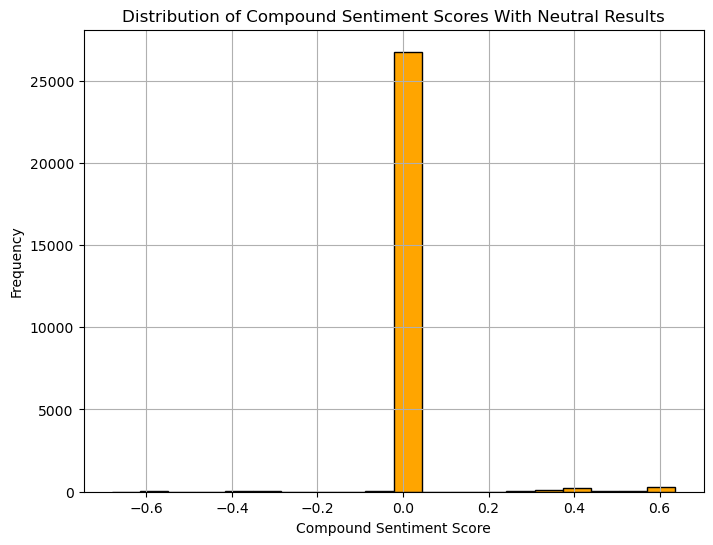

In [4]:
# Visualizing Results With Neutral Results
import matplotlib.pyplot as plt

# Extract compound sentiment score
compound_score = [score["compound"] for score in sentiment_scores]

# Plot histogram of comound sentiment score
plt.figure(figsize=(8,6))
plt.hist(compound_score, bins=20, color="orange", edgecolor="black", label="With Neutral")
plt.title("Distribution of Compound Sentiment Scores With Neutral Results")
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

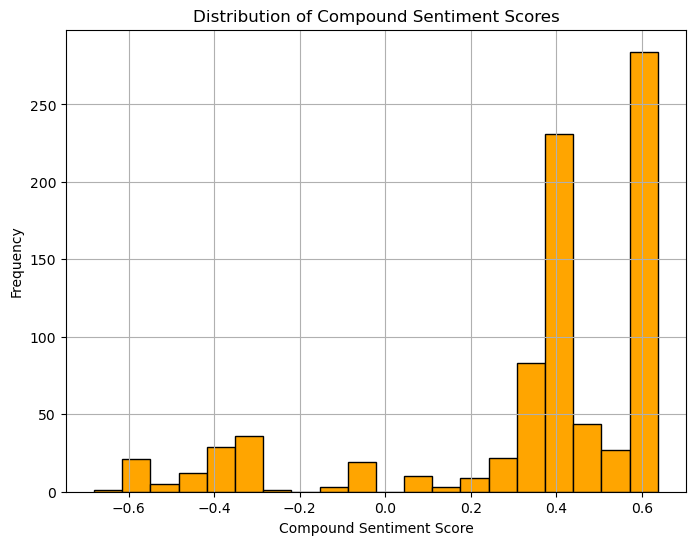

In [5]:
# Visualizing Results Without Neutral Results
import matplotlib.pyplot as plt

# Extract compound sentiment score
compound_score2 = [score["compound"] for score in sentiment_scores if score["compound"] > 0.0 or score["compound"] < 0.0]

# Plot histogram of comound sentiment score
plt.figure(figsize=(8,6))
plt.hist(compound_score2, bins=20, color="orange", edgecolor="black", label="Without Neutral")
plt.title("Distribution of Compound Sentiment Scores")
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()